# Datensatz runterladen

In [ ]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv"
import pandas
t = pandas.read_csv(url, header=None)
t

In [ ]:
t.to_csv("ecgs.csv")

# Daten fürs ML vorbereiten

In [ ]:
x = t.iloc[:,0:-1]

In [ ]:
x.shape

In [ ]:
y = t.iloc[:,-1]

In [ ]:
y.shape

In [ ]:
y[:10]

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
y_test[:10]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled_normal   = x_train_scaled[ y_train.astype(bool) ]
x_train_scaled_abnormal = x_train_scaled[ ~y_train.astype(bool) ]

x_test_normal   = x_test_scaled[ y_test.astype(bool) ]
x_test_abnormal = x_test_scaled[ ~y_test.astype(bool) ]

# Alles in einer Codezelle

In [1]:
# 1. Daten runterladen
url = "http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv"
import pandas
t = pandas.read_csv(url, header=None)

# 2. Daten fürs ML vorbereiten
x = t.iloc[:,0:-1]
y = t.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled_normal   = x_train_scaled[ y_train.astype(bool) ]
x_train_scaled_abnormal = x_train_scaled[ ~y_train.astype(bool) ]
x_test_normal   = x_test_scaled[ y_test.astype(bool) ]
x_test_abnormal = x_test_scaled[ ~y_test.astype(bool) ]

In [ ]:
type(x_train_scaled_normal)

In [ ]:
x_train_scaled_normal.shape

In [ ]:
x_train_scaled.shape

# Exkurs: Skalierung von Daten

In [ ]:
d = {"A" : [-10,10,0,5,-5],
     "B" : [-200,-100,0,100,200]}
import pandas
t2 = pandas.DataFrame(d)
t2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(t2)
s.transform(t2)

In [ ]:
type(x_train_scaled)

In [ ]:
x_train.iloc[:,0].values.min()

In [ ]:
x_train_scaled[:,0].min()

In [ ]:
x_train_scaled[:,0].max()

# Boolean Indexing

In [ ]:
t2

In [ ]:
t2.shape

In [ ]:
t2.iloc[[0,3]]

In [ ]:
t2[ [True, False, False, True, False] ] 

In [ ]:
x_train[ y_train.astype(bool ) ]

# Zeitreihen plotten

In [ ]:
# 1. Daten runterladen
url = "http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv"
import pandas
t = pandas.read_csv(url, header=None)

# 2. Daten fürs ML vorbereiten
x = t.iloc[:,0:-1]
y = t.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled_normal   = x_train_scaled[ y_train.astype(bool) ]
x_train_scaled_abnormal = x_train_scaled[ ~y_train.astype(bool) ]
x_test_normal   = x_test_scaled[ y_test.astype(bool) ]
x_test_abnormal = x_test_scaled[ ~y_test.astype(bool) ]

In [2]:
x_train_scaled_normal.shape

(2351, 140)

## Normale Zeitreihen

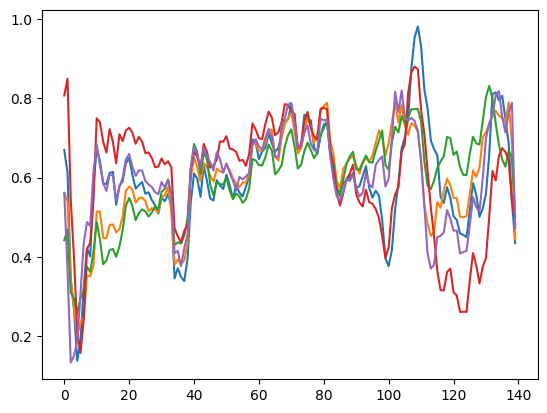

In [8]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot( x_train_scaled_normal[i] )
plt.show()

## Annormale Zeitreihen

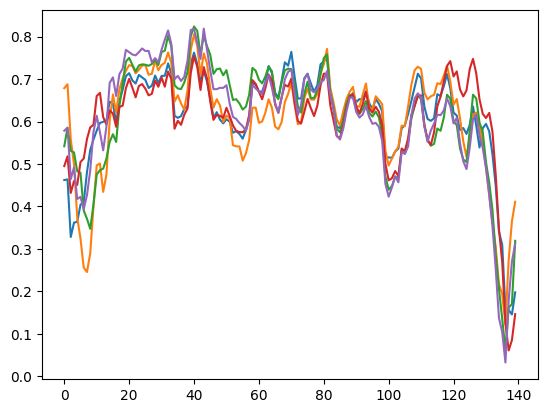

In [9]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot( x_train_scaled_abnormal[i] )
plt.show()

# Autoencoder erstellen und trainieren

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1286
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0674 
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464 
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0454 
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0453 
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0453 
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451 
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0447 
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0427 
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0408 
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0384 
Epoch 15/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - los

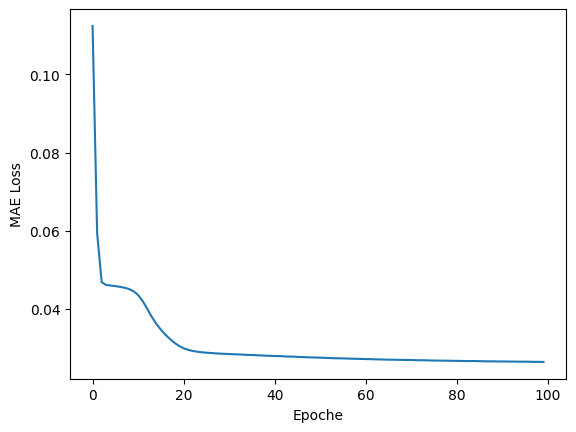

In [79]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, losses

class AnomalyDetector(Model):

    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = Sequential(
            [
                #layers.Dense(32, activation="relu"),
                #layers.Dense(16, activation="relu"),
                layers.Dense(8, activation="relu")
            ])

        self.decoder = Sequential(
            [
                #layers.Dense(16, activation="relu"),
                #layers.Dense(32, activation="relu"),
                layers.Dense(140, activation="sigmoid")
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = AnomalyDetector()
model.compile(optimizer="adam", loss="mae")
h = model.fit(x_train_scaled_normal, x_train_scaled_normal, epochs=100)

plt.plot(h.history["loss"])
plt.xlabel("Epoche")
plt.ylabel("MAE Loss")
plt.show()

In [12]:
2351/32

73.46875

# Wie sehen rekonstruierte Zeitreihen aus?

In [13]:
model

<AnomalyDetector name=anomaly_detector, built=True>

In [16]:
x_test_normal.shape

(568, 140)

In [14]:
reconstructed_test_normal = model(x_test_normal)

In [17]:
reconstructed_test_normal.shape

TensorShape([568, 140])

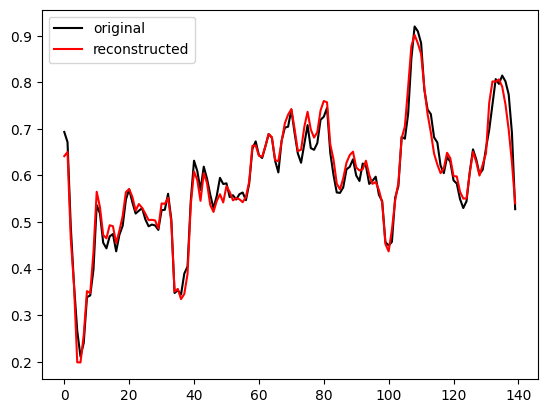

In [21]:
id = 3
plt.plot( x_test_normal[id], color="black", label="original" )
plt.plot( reconstructed_test_normal[id], color="red", label="reconstructed" )
plt.legend()
plt.show()

In [22]:
reconstructed_test_abnormal = model(x_test_abnormal)

In [25]:
import numpy as np
np.arange(140)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

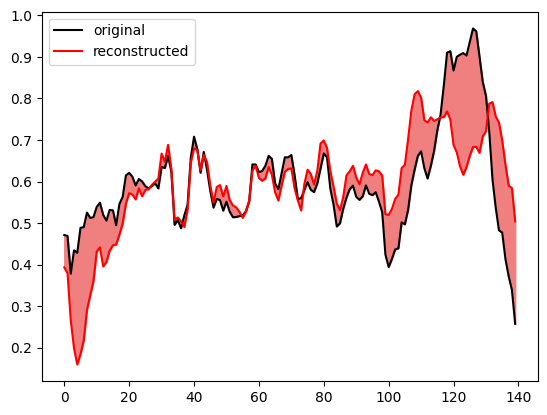

In [27]:
id = 0
plt.plot( x_test_abnormal[id], color="black", label="original" )
plt.plot( reconstructed_test_abnormal[id], color="red", label="reconstructed" )
plt.fill_between(np.arange(140), x_test_abnormal[id], reconstructed_test_abnormal[id], color="lightcoral")
plt.legend()
plt.show()

# Eine Rekonstruktionsschwelle festlegen

In [29]:
reconstructed_train_normal = model(x_train_scaled_normal)

In [30]:
reconstructed_train_normal.shape

TensorShape([2351, 140])

2351

In [42]:
from sklearn.metrics import mean_absolute_error

reconstructed_train_normal = model(x_train_scaled_normal)
N = x_train_scaled_normal.shape[0]
MAEs_normal = []
for id in range(N):
    MAE = mean_absolute_error(x_train_scaled_normal[id], reconstructed_train_normal[id].numpy())
    MAEs_normal.append(MAE)


reconstructed_train_abnormal = model(x_train_scaled_abnormal)
N = x_train_scaled_abnormal.shape[0]
MAEs_abnormal = []
for id in range(N):
    MAE = mean_absolute_error(x_train_scaled_abnormal[id], reconstructed_train_abnormal[id].numpy())
    MAEs_abnormal.append(MAE)

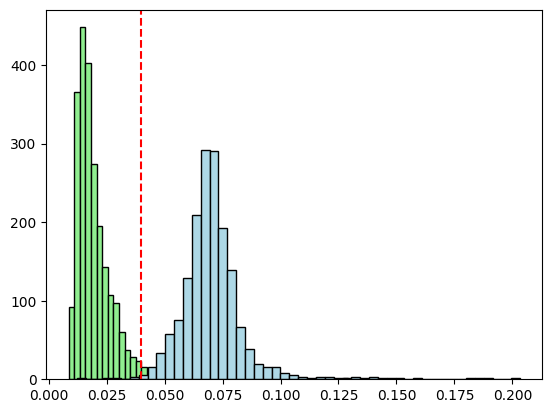

In [70]:
threshold = np.mean(MAEs_normal) + 2*np.std(MAEs_normal)

plt.hist(MAEs_normal,   bins=50, color="lightgreen", edgecolor="black")
plt.hist(MAEs_abnormal, bins=50, color="lightblue", edgecolor="black")
plt.axvline(threshold, color="red", linestyle="--")
plt.show()

# Anomalie-Detektor

In [50]:
np.arange(1,26).reshape(-1,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [71]:
#ts = x_test_normal[10]
ts = x_test_abnormal[3]

def classify(ts):
    reconstruction = model( ts.reshape(-1,140) )
    reco_error = mean_absolute_error(reconstruction.numpy().flatten(), ts)
    if reco_error < threshold:
        return 1
    else:
        return 0

classify(ts)

0

# Wie gut ist der Anomalie-Detektor?

In [75]:
def analyze_prediction_accuracy(comment, ts, desired_output):
    print(f"Testing with {comment} time series...")
    N = ts.shape[0]
    correct = 0
    for id in range(N):
        correct += (desired_output==classify(ts[id]))
    print(f"{correct} are correctly classifed of {N} samples.")

analyze_prediction_accuracy("normal", x_test_normal, 1)
analyze_prediction_accuracy("abnormal", x_test_abnormal, 0)

Testing with normal time series...
540 are correctly classifed of 568 samples.
Testing with abnormal time series...
428 are correctly classifed of 432 samples.


In [80]:
def analyze_prediction_accuracy(comment, ts, desired_output):
    print(f"Testing with {comment} time series...")
    N = ts.shape[0]
    correct = 0
    for id in range(N):
        correct += (desired_output==classify(ts[id]))
    print(f"{correct} are correctly classifed of {N} samples.")

analyze_prediction_accuracy("normal", x_test_normal, 1)
analyze_prediction_accuracy("abnormal", x_test_abnormal, 0)

Testing with normal time series...
501 are correctly classifed of 568 samples.
Testing with abnormal time series...
429 are correctly classifed of 432 samples.


# Image Anomaly Detector

In [87]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297

2025-01-20 17:00:02.052458: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,1,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,16,28,28]{3,2,1,0}, f32[1,16,3,3]{3,2,1,0}, f32[1]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0296 - val_loss: 0.0058
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0021 - val_loss: 0.0021


In [95]:
from sklearn.metrics import mean_absolute_error

reconstructed_train_normal = autoencoder(x_train)
N = x_train.shape[0]
MAEs_normal = []
for id in range(N):
    MAE = mean_absolute_error(x_train[id,:,:,:].flatten(),
                              reconstructed_train_normal[id,:,:,:].numpy().flatten())
    MAEs_normal.append(MAE)

In [96]:
threshold = np.mean(MAEs_normal) + 2*np.std(MAEs_normal)

In [103]:
type(x_test)

numpy.ndarray

In [102]:
type(x_test_noisy)

tensorflow.python.framework.ops.EagerTensor

In [104]:
#img = x_test[0]
img = x_test_noisy[0].numpy()

def classify(img):
    reconstruction = autoencoder( img.reshape(-1,28,28,1) )
    reco_error = mean_absolute_error(img.flatten(),
                                     reconstruction.numpy().flatten())
    if reco_error < threshold:
        return 1
    else:
        return 0

classify(img)

0

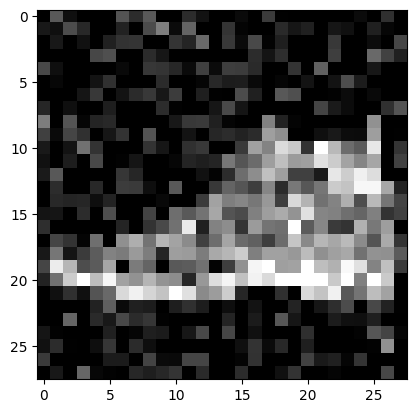

In [99]:
plt.imshow(x_test_noisy[0], cmap="gray")
plt.show()